# Введение в искусственные нейронные сети
# Урок 5. Сверточные нейронные сети

In [5]:
!pip install opencv-python

In [6]:
import cv2
import numpy as np
from scipy import misc
I = misc.ascent() # Получите 8-битное изображение в оттенках серого с битовой
# глубиной 512 x 512 для удобства использования в демонстрационных версиях

C:\Users\vkhur\AppData\Local\Temp\ipykernel_9320\3335804039.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  I = misc.ascent() # Получите 8-битное изображение в оттенках серого с битовой


In [7]:
I.shape

(512, 512)

In [8]:
I[101:131,120:130]

array([[ 98, 100, 101, 102, 101, 102, 101,  89,  83,  88],
       [100, 103, 102, 102, 101,  92,  81,  89,  92,  82],
       [102, 103, 101,  94,  86,  87,  98,  82,  67,  84],
       [103,  96,  85,  88,  98,  90,  63,  58,  88,  97],
       [ 90,  92,  99,  92,  67,  49,  63,  93,  97,  95],
       [ 98,  92,  68,  51,  64,  90, 100,  97,  98,  99],
       [ 71,  48,  63,  88, 102, 101,  97,  97,  98,  98],
       [ 64,  85, 102, 104,  97,  95,  97,  98,  97,  98],
       [ 99, 103, 101, 100,  97,  98,  98,  97,  98,  97],
       [ 98, 101,  99,  99,  97,  97,  97,  98,  97,  98],
       [100, 100,  99,  97,  97,  97,  98,  97,  97,  99],
       [101, 100,  99,  97,  99, 100,  99,  97,  97,  98],
       [101, 101,  98,  98,  99, 101,  98,  98,  98,  98],
       [100,  99, 102, 100,  99,  97,  97,  98, 100, 100],
       [100,  99, 101, 101,  99,  98,  98,  99, 101, 100],
       [101, 101, 100, 101, 101, 101, 101, 101, 100, 101],
       [101, 101, 100,  99, 100, 101, 100, 101, 101,  99

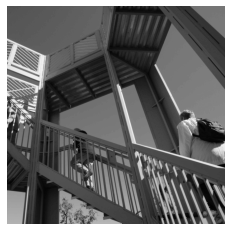

In [9]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(I)
plt.show()

СОздаем копию массива I с помощью функции np.copy(). Копия сохраняется в переменной I_transformed. Затем размеры копии I_transformed сохраняются в переменные size_x и size_y. size_x содержит количество строк в I_transformed, а size_y содержит количество столбцов.

In [10]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

Определяем матрицу фильтра и вес для свертки изображения. Фильтр можно использовать для применения различных эффектов к изображению, таких как размытие, усиление краев или обнаружение границ. В данном случае, определен фильтр, который помогает обнаружить вертикальные края на изображении.

- Первый фильтр является простым фильтром усреднения, представленным матрицей размером 3x3. Каждый элемент матрицы имеет значение 1. Вес для свертки установлен равным 15.

- Второй фильтр представляет собой фильтр усиления краев. Он помогает выделить контуры объектов на изображении. Он также имеет размер 3x3 и содержит значения [0, 1, 0, 1, -4, 1, 0, 1, 0].

- Третий фильтр похож на второй, но с некоторым изменением в значениях элементов матрицы. Он состоит из следующих значений: [-1, -2, -1, 1, -4, 1, 0, 1, 0].

- Последний фильтр является фильтром Собеля и применяется для обнаружения вертикальных или горизонтальных краев на изображении. Он состоит из следующих значений: [-1, 0, 1, -2, 0, 2, -1, 0, 1].

Вес для свертки установлен равным 1 и указывает, что каждый элемент фильтра будет умножаться на соответствующий пиксель изображения.

In [11]:
# filter = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]])/15
#Фильтры края.

#Разные фильтры.
# filter = np.array([ [0, 1, 0], [1, -4, 1], [0, 1, 0]])

#Много разных
# filter = np.array([ [-1, -2, -1], [1, -4, 1], [0, 1, 0]])
filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#зададим вес для свертки
weight = 1

In [12]:
np.array(filter).shape

(3, 3)

In [13]:
np.array(filter).T

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

##Свертка

In [14]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (I[x - 1, y-1] * filter[0][0])
    convolution = convolution + (I[x, y-1] * filter[0][1])
    convolution = convolution + (I[x + 1, y-1] * filter[0][2])
    convolution = convolution + (I[x-1, y] * filter[1][0])
    convolution = convolution + (I[x, y] * filter[1][1])
    convolution = convolution + (I[x+1, y] * filter[1][2])
    convolution = convolution + (I[x-1, y+1] * filter[2][0])
    convolution = convolution + (I[x, y+1] * filter[2][1])
    convolution = convolution + (I[x+1, y+1] * filter[2][2])
    if(convolution<0):
      convolution=-convolution
    if(convolution>255):
      convolution=255
    I_transformed[x, y] = convolution

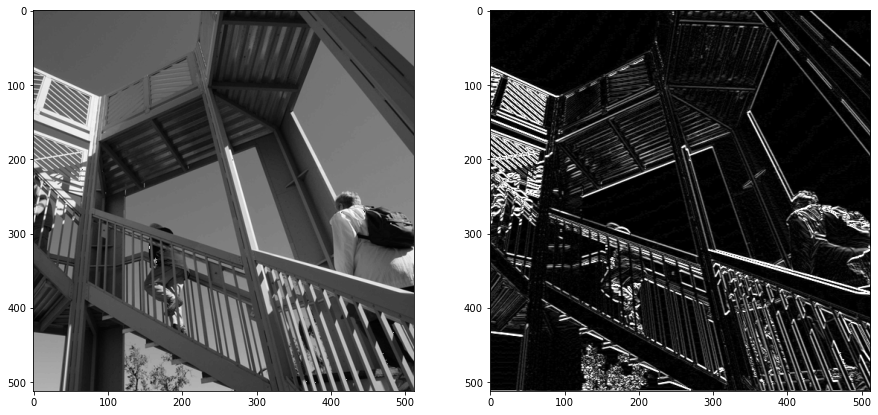

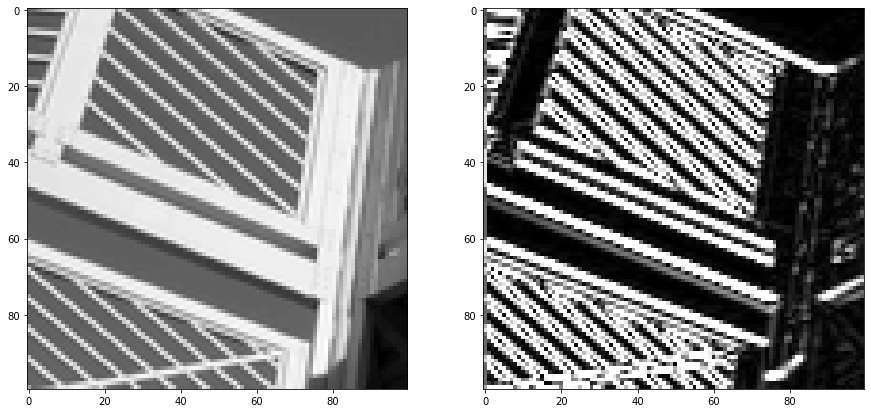

In [15]:
plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(I_transformed)
plt.show()

ymin,ymax,xmin,xmax = 100,200,0,100

plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
plt.show()

## Нейронная сеть Lenet5.

Lenet5 - это одна из первых сверточных нейронных сетей и она отражает характерные для сверточных нейронных сетей набор элементов - сверточные слои, пуллинг слои и полносвязные слои на конце нейронной сети. Данная архитектура послужила основой для многих современных архитектур сверточных нейронных сетей.

In [16]:
from keras.datasets import mnist
from keras.utils import to_categorical

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255
x_test /= 255

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

from keras.models import Sequential
from keras import models, layers
import keras

# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый сверточный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=x_train,y=y_train, epochs=1, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))




313/313 [==============================] - 4s 14ms/step - loss: 0.3394 - accuracy: 0.9070
Test loss 0.3394, accuracy 90.70%


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 27, 27, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 11, 11, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 5880)              0

## Пример на Keras более сложной сверточной нейронной сети

> Indented block



Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [19]:
from __future__ import print_function
import keras # расскоментируйте эту строку, чтобы начать обучение
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# установка параметров нейросети
batch_size = 3
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()

# compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# start training
epochs = 20

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))


# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# компиляция модели
model.compile(loss='categorical_crossentropy',
               optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (60000, 28, 28)
60000 тренировочные примеры
10000 тестовые примеры
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         73856     
                                      

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (60000, 28, 28))


Сообщение об ошибке связано с формой ввода (60000, 28, 28) при использовании ImageDataGenerator в Keras.

- ImageDataGenerator ожидает, что входные данные будут иметь форму ранг 4, включая измерение цветового канала.
- Чтобы решить эту проблему, нужно изменить форму входных данных, чтобы они имели форму ранга 4, добавив измерение цветового канала.
- Поскольку  изображения имеют оттенки серого, размер цветового канала будет иметь размер 1.

In [20]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# Set the neural network parameters
batch_size = 3
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_trained_model.h5'

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'testing examples')

# Reshape the input data to have a rank-4 shape
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Convert class labels to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# Start training
if not data_augmentation:
    print('Not using data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation')

    # Create an ImageDataGenerator instance with desired augmentation configurations
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip=False)

    # Fit the generator to the training data
    datagen.fit(x_train)

    # Train the model using the augmented data generator
    model.fit(datagen.flow(x_train, y_train,
                           batch_size=batch_size),
              epochs=epochs,
              validation_data=(x_test, y_test))

# Save the trained model
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at', model_path)

# Evaluate the model on the test data
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


x_train shape: (60000, 28, 28)
60000 training examples
10000 testing examples
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 128)         73856     
                                          

In [22]:
!pip install tensorflow-datasets


  Using cached tensorflow_datasets-4.9.3-py3-none-any.whl (5.0 MB)
  Using cached array_record-0.4.1-py39-none-any.whl (3.0 MB)
  Using cached tensorflow_metadata-1.14.0-py3-none-any.whl (28 kB)
  Using cached dm_tree-0.1.8-cp39-cp39-win_amd64.whl (101 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.0.0
    Uninstalling absl-py-2.0.0:
      Successfully uninstalled absl-py-2.0.0


### Модель 1 
(Параметры:
batch_size = 32
num_classes = 10
epochs = 3 )

In [23]:
from __future__ import print_function
import keras
from keras.applications import ResNet50
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
import os

# Установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 3

# Загрузка данных ImageNet
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Создание генераторов для обучающей и тестовой выборок
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

# Создание предварительно обученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение модели
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


94765736/94765736 [==============================] - 75s 1us/step
Epoch 1/3


C:\Users\vkhur\AppData\Local\Temp\ipykernel_9320\158877020.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


1562/1562 [==============================] - 3228s 2s/step - loss: 142.2245 - accuracy: 0.0203 - val_loss: 113.9224 - val_accuracy: 0.0050
Epoch 2/3
1562/1562 [==============================] - 3037s 2s/step - loss: 142.0136 - accuracy: 0.0320 - val_loss: 128.4960 - val_accuracy: 0.0241
Epoch 3/3
1562/1562 [==============================] - 6085s 4s/step - loss: 236.0624 - accuracy: 0.0457 - val_loss: 378.9582 - val_accuracy: 0.0025


C:\Users\vkhur\AppData\Local\Temp\ipykernel_9320\158877020.py:47: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)


Test loss: 379.04327392578125
Test accuracy: 0.0025040064938366413


## Практическое задание

<ol>
    <li>Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.
    </li>
    <li>Описать также в анализе какие необоходимо внести изменения  в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.
    </li>
</ol>

### Модель 2 
(Параметры:
batch_size = 16
num_classes = 5
epochs = 2 )

In [24]:
from __future__ import print_function
import keras
from keras.applications import ResNet50
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
import os

# Установка параметров нейросети
batch_size = 16
num_classes = 5
epochs = 2

# Загрузка данных ImageNet
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Создание генераторов для обучающей и тестовой выборок
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

# Создание предварительно обученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение модели
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/2


C:\Users\vkhur\AppData\Local\Temp\ipykernel_9320\3644884401.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


3125/3125 [==============================] - 26043s 8s/step - loss: 39.8849 - accuracy: 0.1361 - val_loss: 41.2090 - val_accuracy: 0.1133
Epoch 2/2
3125/3125 [==============================] - 4890s 2s/step - loss: 39.2405 - accuracy: 0.2089 - val_loss: 39.4208 - val_accuracy: 0.0053


C:\Users\vkhur\AppData\Local\Temp\ipykernel_9320\3644884401.py:47: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)


Test loss: 39.42073059082031
Test accuracy: 0.0052999998442828655


### Модель 3 
(Параметры:
batch_size = 50
num_classes = 15
epochs = 5 )

In [ ]:
from __future__ import print_function
import keras
from keras.applications import ResNet50
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
import os

# Установка параметров нейросети
batch_size = 50
num_classes = 15
epochs = 5

# Загрузка данных ImageNet
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Создание генераторов для обучающей и тестовой выборок
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

# Создание предварительно обученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение модели
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/5


C:\Users\vkhur\AppData\Local\Temp\ipykernel_9320\3042625731.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


1000/1000 [==============================] - 2856s 3s/step - loss: 324.9165 - accuracy: 0.2542 - val_loss: 328.8765 - val_accuracy: 0.0853
Epoch 2/5
1000/1000 [==============================] - 2773s 3s/step - loss: 253.6338 - accuracy: 0.3522 - val_loss: 638.9819 - val_accuracy: 0.0835
Epoch 3/5
 914/1000 [==========================>...] - ETA: 4:38 - loss: 898.0899 - accuracy: 0.1953

1. Модель номер 3 не отработала до конца, не хватает ресурсов компьера на работу потратил около 8 часов. Судя по всему лучший результат покажет, именно модель номер 3 с параметрами:
batch_size = 50
num_classes = 15
epochs = 5 )

2. Если бы модели нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET, то нужно внести изменения в получившуюся нейронную сеть добавив слои, так как нужно разбить цветное изображении на три отдельныйх слоя. R/G/B красный, зеленый, голубой и обрабатывать их отдельно.